# Interpretating Echocardiograms using Neural Networks

In [1]:
!pip install -q git+https://github.com/tensorflow/docs

In [2]:

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer, Dropout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

## Import Data

In [3]:
# connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#unziping file and saving to a new folder
# -d creates a new file directory

#!unzip drive/"My Drive/Project_6_Echo/Test_Images/Test_Images.zip" -d drive/"My Drive/Project_6_Echo/Test_Images"

In [5]:
#!unzip "/content/drive/MyDrive/Project_6_Echo/Train_Images/Train_Images.zip" -d "/content/drive/MyDrive/Project_6_Echo/New_Train"

## Image Preprocessing

In [4]:
# generator for training set

train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory='drive/MyDrive/Project_6_Echo/Training_Images', 
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(112, 112),
    seed=10)

Found 22176 files belonging to 3 classes.


In [5]:
# generator for validation set

val_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory='drive/My Drive/Project_6_Echo/Val_Images', 
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(112, 112),
    seed=10)

Found 3819 files belonging to 3 classes.


In [6]:
# generator for testing set

test_generator = tf.keras.preprocessing.image_dataset_from_directory(
    directory='drive/My Drive/Project_6_Echo/Test_Images', 
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    batch_size=32,
    image_size=(112, 112),
    seed=10)

Found 3792 files belonging to 3 classes.


## Modeling

### Model 1: Simple CNN w/ 30 epochs: train accuracy: 0.7523, val 0.694

In [ ]:
NN = Sequential()

NN.add(InputLayer(input_shape=(112, 112, 1)))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())

NN.add(Flatten())
NN.add(Dense(20, activation='relu'))
NN.add(Dropout(.20))
NN.add(Dense(3, activation='softmax'))  # 3 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()
NN.fit(train_generator, epochs=30)

In [9]:
# save the specified model to google drive

NN.save('model_1')

INFO:tensorflow:Assets written to: model_1/assets


In [ ]:
def get_y_ypred(generator_name, model):
  '''Extracts labels (y) and predictions (y_pred) from generator and model)
  '''
  predictions = np.array([])
  labels = np.array([])
  for x, y in generator_name:
    predictions = np.concatenate((predictions, np.argmax(model.predict(x), axis=1)))
    labels = np.concatenate((labels, np.argmax(y, axis=1)))
  return labels, predictions

In [33]:
# accuracy on training data

y_train, y_pred_train = get_y_ypred(train_generator, model=NN)
accuracy_score(y_train, y_pred_train)

0.7253787878787878

In [34]:
# accuracy on validation data

y_val, y_pred_val = get_y_ypred(val_generator, model=NN)
accuracy_score(y_val, y_pred_val)

0.6949463210264467

In [24]:
# loads saved model

reconstructed_NN = keras.models.load_model('model_1')

In [25]:
# using reconstructed model

y1_train, y1pred_train = get_y_ypred(train_generator, model=reconstructed_NN)

### Model 2: more complex CNN - train accuracy: 0.7789, val 0.729

In [23]:
NN = Sequential()

NN.add(InputLayer(input_shape=(112, 112, 1)))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())

NN.add(Flatten())
NN.add(Dense(200, activation='relu'))
NN.add(Dropout(.30))
NN.add(Dense(3, activation='softmax'))  # 3 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()
NN.fit(train_generator, epochs=30)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 112, 112, 10)      100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 10)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 20)        1820      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 30)        5430      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 30)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 30)               

In [8]:
# save the model to google drive
# will revisit this model in final model section

NN.save('model_2')

INFO:tensorflow:Assets written to: model_2/assets


### Model 3: more complex CNN, accuracy: train 0.7928, val 0.720
>- So model appears overfit

In [107]:
NN = Sequential()

NN.add(InputLayer(input_shape=(112, 112, 1)))

NN.add(Conv2D(filters=10, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=20, kernel_size=3, activation='relu', padding='same'))
NN.add(MaxPooling2D())
NN.add(Conv2D(filters=30, kernel_size=3, activation='relu', padding='same'))
NN.add(GlobalAveragePooling2D())

NN.add(Flatten())
NN.add(Dense(500, activation='relu'))
NN.add(Dropout(.30))
NN.add(Dense(200, activation='relu'))
NN.add(Dropout(.30))
NN.add(Dense(3, activation='softmax'))  # 3 target classes

NN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)
NN.summary()
NN.fit(train_generator, epochs=30)

693/693 [==============================] - 15s 22ms/step - loss: 0.6133 - accuracy: 0.7361
Epoch 14/30
693/693 [==============================] - 16s 23ms/step - loss: 0.6019 - accuracy: 0.7442
Epoch 15/30
693/693 [==============================] - 16s 22ms/step - loss: 0.5946 - accuracy: 0.7427
Epoch 16/30
693/693 [==============================] - 16s 22ms/step - loss: 0.5875 - accuracy: 0.7471
Epoch 17/30
693/693 [==============================] - 16s 23ms/step - loss: 0.5747 - accuracy: 0.7491
Epoch 18/30
693/693 [==============================] - 17s 24ms/step - loss: 0.5706 - accuracy: 0.7555
Epoch 19/30
693/693 [==============================] - 17s 24ms/step - loss: 0.5611 - accuracy: 0.7595
Epoch 20/30
693/693 [==============================] - 17s 24ms/step - loss: 0.5522 - accuracy: 0.7642
Epoch 21/30
693/693 [==============================] - 17s 25ms/step - loss: 0.5479 - accuracy: 0.7670
Epoch 22/30
693/693 [==============================] - 17s 24ms/step - loss: 0.5421 -

In [108]:
# save the model to google drive

NN.save('model_3')

INFO:tensorflow:Assets written to: model_3/assets


In [112]:
# get accuracy of training data

images, y_train, y_pred_train = get_info(train_generator, model=NN)
accuracy_score(y_train, y_pred_train)

0.7952290764790765

In [113]:
# accuracy on validation data
# model seems to be overfit

val_images, y_val, y_pred_val = get_info(val_generator, model=NN)
accuracy_score(y_val, y_pred_val)

0.7295103430217335

## Final Model
Model #2 - has the best validation score

In [9]:
# loading saved model
NN_reload = keras.models.load_model('model_2')

In [40]:
def get_info(generator_name, model):
  '''Extracts image data, labels (y) and predictions (y_pred) from generator 
  and model)
  '''
  
  predictions = np.array([])
  labels = np.array([])
  images = []
  for x, y in generator_name:
    predictions = np.concatenate((predictions, np.argmax(model.predict(x), axis=1)))
    labels = np.concatenate((labels, np.argmax(y, axis=1)))
    images.append(x)
  images = np.concatenate(images)
  return images, labels, predictions

In [42]:
# get accuracy of training data

train_images, y_train, y_pred_train = get_info(train_generator, model=NN_reload)
accuracy_score(y_train, y_pred_train)

0.7729978354978355

In [43]:
# accuracy on validation data
# model seems to be somewhat overfit, but has the best accuracy score out of all models

val_images, y_val, y_pred_val = get_info(val_generator, model=NN_reload)
accuracy_score(y_val, y_pred_val)

0.7295103430217335

In [41]:
# accuracy on testing data

test_images, y_test, y_pred_test = get_info(test_generator, model=NN)
accuracy_score(y_test, y_pred_test)

0.742879746835443

In [15]:
test_images.shape

(3792, 112, 112, 1)

In [44]:
# making a df of labels and predictions (from testing set)
# includes a correct columns - True if prediction is correct, otherwise false

df = pd.DataFrame({"label": y_test, "predictions": y_pred_test})
df['correct'] = df['label'] == df['predictions']
df.head(10)

,label,predictions,correct
0,0.0,0.0,True
1,1.0,1.0,True
2,2.0,1.0,False
3,2.0,2.0,True
4,0.0,0.0,True
5,1.0,1.0,True
6,1.0,1.0,True
7,0.0,0.0,True
8,2.0,0.0,False
9,0.0,0.0,True


In [45]:
# Returns rows that are not correct
# 1030 out of 3792 images in test set

df[~df['correct']]

,label,predictions,correct
2,2.0,1.0,False
8,2.0,0.0,False
11,2.0,0.0,False
21,1.0,2.0,False
28,2.0,0.0,False
...,...,...,...
3779,0.0,1.0,False
3780,2.0,0.0,False
3783,0.0,2.0,False
3784,2.0,1.0,False


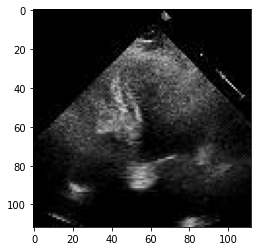

In [48]:
# image of an incorrect classification (2 --> 1)


plt.imshow(test_images[2, :, :, :].reshape((112,112)), cmap='gray')

Text(231.4444444444446, 0.5, 'Actual class')

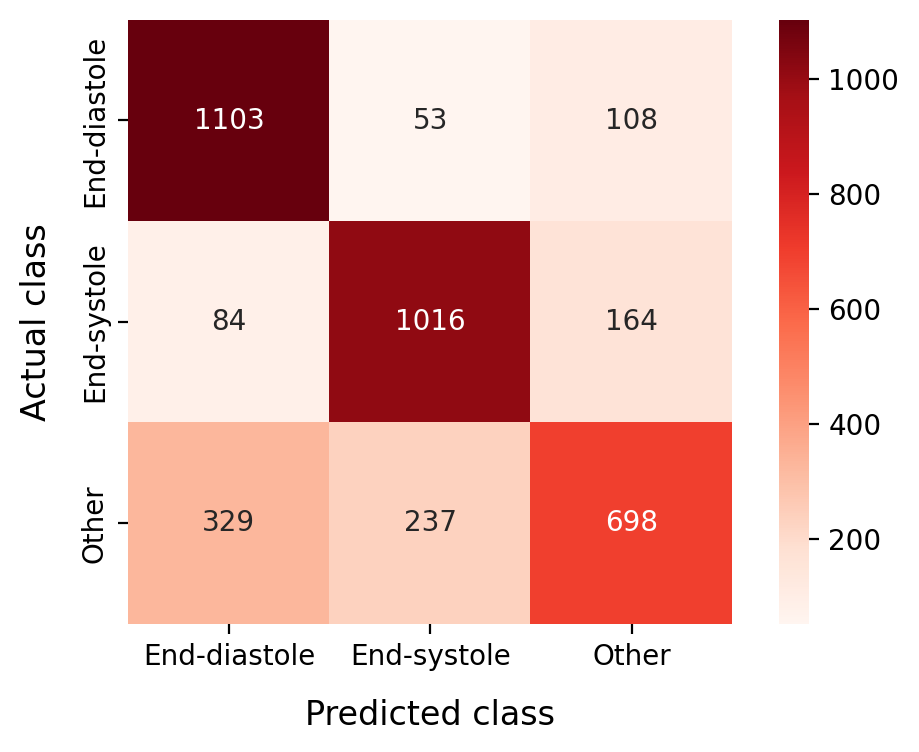

In [39]:
# confusion matrix on test data

plt.figure(dpi=200)
confusion_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion_test, cmap=plt.cm.Reds, annot=True, square=True, fmt='d',
            xticklabels=['End-diastole', 'End-systole', 'Other'],
            yticklabels=['End-diastole', 'End-systole', 'Other'] )
plt.xlabel('Predicted class', labelpad=10, fontsize=12)
plt.ylabel('Actual class', labelpad=10, fontsize=12)
#plt.title('Classification of cardiac cycle images',);

In [27]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.87      0.79      1264
         1.0       0.78      0.80      0.79      1264
         2.0       0.72      0.55      0.62      1264

    accuracy                           0.74      3792
   macro avg       0.74      0.74      0.74      3792
weighted avg       0.74      0.74      0.74      3792



In [21]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.72      0.77      1264
         1.0       0.84      0.65      0.73      1264
         2.0       0.58      0.80      0.67      1264

    accuracy                           0.72      3792
   macro avg       0.75      0.72      0.73      3792
weighted avg       0.75      0.72      0.73      3792

